In [12]:
### Importing dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 75)
# %matplotlib inline

In [13]:

### Function to convert categorical column to numerical for clustering

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Create some toy data in a Pandas dataframe

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [14]:
### Importing the dataset

df_raw = pd.read_csv("final_data_v04.20.csv")
df_donor_id=df_raw[["donor_identifier"]]

In [15]:
### Treating missing values

# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Numerical_columns=list(df_raw.select_dtypes(include=numerics).columns)
# Categorical_columns=list(df_raw.select_dtypes('object').columns)
    
    
df_raw.drop("donor_identifier",inplace=True,axis=1)

In [16]:
# selected_list=[     
#                  '2nd Dona of the week Bonus_sum(donors)',
#        '2nd Dona of the week Bonus_sum(applied_amount)', 
# 	   'Base_sum(donors)',
#        'Base_sum(applied_amount)', 
# 	   'Lapsed_sum(donors)',
#        'Lapsed_sum(applied_amount)', 
# 	   'New Donor Bonus_sum(donors)',
#        'New Donor Bonus_sum(applied_amount)',
# 	   'Retention Bonus_sum(donors)',
#        'Retention Bonus_sum(applied_amount)', 
# 	   'others_sum(donors)',
#        'others_sum(applied_amount)',
# 	   'donors', 'donations',
# 	   'avg_grifols_amt'
    

# ]


In [17]:
selected_list=[     'donor_status', 
                 'num_donations',
                 'num_site_code',
               'total_liters',
               'unqualified_flag',
               'dcc_per_liters',
               'liters_per_visit',
               'avg_processing_time',
               'cnt_new_donor_bonus',
               'cnt_lapsed_bonus',
               'cnt_retention_bonus',
               'cnt_second_week_donor_bonus',
               
                     'sum_grifols_total_paid',
                     'cat_new_donor_bonus_flag',
                     'cat_marketing_flag',
                     'cat_retention_bonus_flag',
                     'cat_center_bonus_flag',
                     'cat_lapsed_bonus_flag',
                     'cat_deferral_bonus_flag',
#                      'cat_buddy_flag',
                     'density_type',
                     'age',
                     'gender',
                     'race',
                     'num_year_enrolled',
                     'donation_freq',
                     'dist_month'
#                      'no_comp_flag',
#                      '2022 Have Internet Access at Home: Percent',
#                      '2022 Unemployed Population 16+: Percent',
#                      '2022-2027 Growth Rate: Population',
#                      '2022 Per Capita Income: Index',
#                      'Median Age',
#                      '2022 Broadband/High Speed Internet Connection at Home: Percent',
#                      '2022 HH Owns or Leases Any Vehicle: Percent',
#                      'Competition',
#                      'Population Growth Score',
#                      'Income Level Score',
#                      'Employment Score',
#                      'Smartphone Usage Score',
#                      'Vehicle Usage Score',
#                      '2022 Total CPL Score',
#                      '2022 DCC Score',
#                      '2022 Labor Score',
#                      '2022 OF Score',
#                      '2022 OV Score',
#                      '2022 Median Disposable Income: Index',
#                      '2022 Have Savings Account: Percent',
#                      '2022 Total Population',
#                      '2022 Have a Smartphone: Percent'

]


In [18]:
### Fetching out the numerical and categorical columns


df_final=pd.DataFrame(df_raw[selected_list])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical_columns=list(df_final.select_dtypes(include=numerics).columns)
Categorical_columns=list(df_final.select_dtypes('object').columns)

for i in Numerical_columns:
    df_final[i]=df_final[i].fillna(0)
    
for i in Categorical_columns:
    df_final[i]=df_final[i].fillna("missing")

df_final=MultiColumnLabelEncoder(columns = Categorical_columns).fit_transform(df_final)

In [19]:
df_final

,donor_status,num_donations,num_site_code,total_liters,unqualified_flag,dcc_per_liters,liters_per_visit,avg_processing_time,cnt_new_donor_bonus,cnt_lapsed_bonus,cnt_retention_bonus,cnt_second_week_donor_bonus,sum_grifols_total_paid,cat_new_donor_bonus_flag,cat_marketing_flag,cat_retention_bonus_flag,cat_center_bonus_flag,cat_lapsed_bonus_flag,cat_deferral_bonus_flag,density_type,age,gender,race,num_year_enrolled,donation_freq,dist_month
0,1,47,1,41.605,0,77.995433,0.885213,83.068085,0,0,4,21,3245.0,0,1,1,1,0,0,3,60.0,1,8,3.0,6.714286,7
1,1,64,1,56.321,0,66.405071,0.880016,96.070052,0,0,15,17,3740.0,0,1,1,0,0,1,3,43.0,1,5,4.0,5.333333,12
2,1,40,1,35.626,1,73.261101,0.890650,100.342500,8,0,5,10,2610.0,1,1,1,0,0,0,3,46.0,0,5,1.0,5.000000,8
3,1,41,1,36.968,0,64.515256,0.901659,94.713821,0,2,10,10,2385.0,0,1,1,1,1,0,3,32.0,1,8,8.0,4.100000,10
4,1,4,1,3.546,0,135.363790,0.886500,98.616667,0,0,0,0,480.0,0,1,0,0,0,1,3,56.0,0,5,2.0,1.333333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835842,0,1,1,0.908,0,110.132159,0.908000,163.116667,1,0,0,0,100.0,1,0,0,0,0,0,3,0.0,2,20,0.0,1.000000,1
835843,0,1,1,0.221,0,452.488688,0.221000,71.900000,1,0,0,0,100.0,1,0,0,0,0,0,3,0.0,2,20,0.0,1.000000,1
835844,0,1,1,0.179,0,558.659218,0.179000,109.783333,1,0,0,0,100.0,1,0,0,0,0,0,1,0.0,2,20,0.0,1.000000,1
835845,0,1,1,0.703,0,177.809388,0.703000,140.500000,1,0,0,0,125.0,1,0,0,0,0,0,3,0.0,2,20,0.0,1.000000,1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:16<00:00,  7.66s/it]


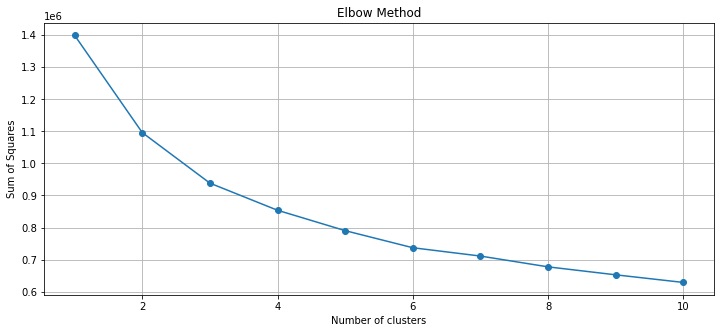

In [20]:
## Normalizing the data points and running K-Means to find the best elbow point
std=MinMaxScaler()
arr1=std.fit_transform(df_final)

SSE = []
for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(arr1)
    SSE.append(kmeans.inertia_)
  

plt.figure(figsize=(12,5))
plt.plot(range(1, 11), SSE,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares')
plt.grid(True)
plt.show()

In [21]:
results = {}

for i in range(2,8):
    kmeans = KMeans(n_clusters=i, random_state=123)
    pred = kmeans.fit_predict(df_final)
    db_index = calinski_harabasz_score(df_final, pred)
    print(f"For {i} cluster the db_index value is {db_index}")
    results.update({i: db_index})

For 2 cluster the db_index value is 9200497.408877023
For 3 cluster the db_index value is 7843562.099475291
For 4 cluster the db_index value is 9860911.186162347
For 5 cluster the db_index value is 12021424.522192687
For 6 cluster the db_index value is 15026166.10388086
For 7 cluster the db_index value is 21280214.875415985


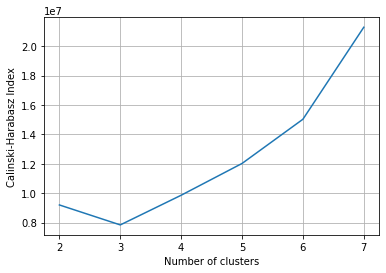

In [22]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.grid(True)
plt.show()

In [23]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    pred = kmeans.fit_predict(df_final)
    centers = kmeans.cluster_centers_

    score = silhouette_score(df_final, pred)
    silhouette_scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))

KeyboardInterrupt: 

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for K-means Clustering')
plt.grid(True)
plt.show()

In [24]:
### Re-Running K-Means with the best value

kmeans_cluster = KMeans(n_clusters =  4, random_state = 123)
result_cluster=kmeans_cluster.fit_predict(arr1)

df_raw['clusters']=result_cluster
df_raw['clusters'].value_counts()

1    465109
2    134700
0    121993
3    114045
Name: clusters, dtype: int64

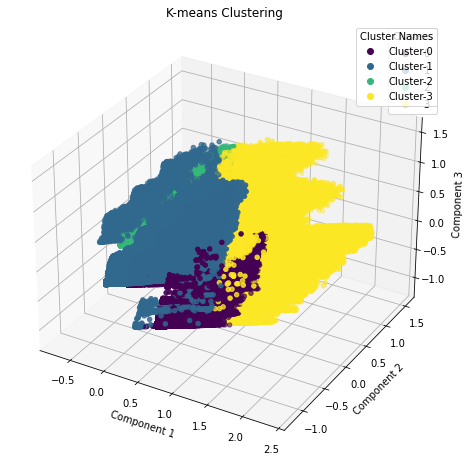

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# # Generate some random data for clustering
# np.random.seed(0)
# X = np.random.randn(100, 5)  # 100 data points with 5 features each

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Set the desired number of clusters
kmeans.fit(arr1)
labels = kmeans.labels_  # Obtain the cluster labels


cluster_names = ['Cluster-0', 'Cluster-1', 'Cluster-2', 'Cluster-3']

# Reduce dimensionality using PCA
pca = PCA(n_components=3)  # Set the desired number of components (2 or 3)
X_reduced = pca.fit_transform(arr1)

# Plot the reduced data points colored by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('K-means Clustering')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Update cluster names in the legend
handles, _ = scatter.legend_elements()
legend2 = ax.legend(handles, cluster_names, title="Cluster Names")

plt.show()


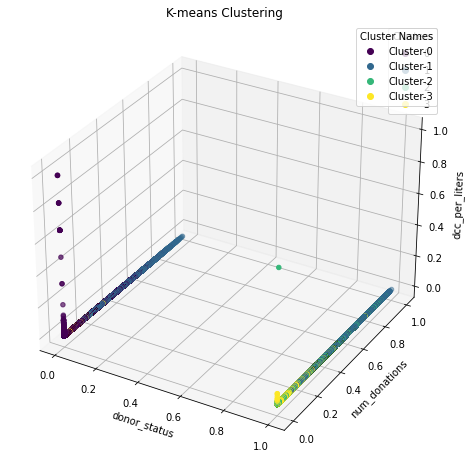

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# # Generate some random data for clustering
# np.random.seed(0)
# X = np.random.randn(100, 5)  # 100 data points with 5 features each

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Set the desired number of clusters
kmeans.fit(arr1)
labels = kmeans.labels_  # Obtain the cluster labels


cluster_names = ['Cluster-0', 'Cluster-1', 'Cluster-2', 'Cluster-3']


donor_status = std.fit_transform(df_final["donor_status"].values.reshape(-1,1))
num_donations = std.fit_transform(df_final["num_donations"].values.reshape(-1,1))
dcc_per_liters = std.fit_transform(df_final["dcc_per_liters"].values.reshape(-1,1))

# Plot the reduced data points colored by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(donor_status, num_donations, dcc_per_liters, c=labels, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('K-means Clustering')
ax.set_xlabel('donor_status')
ax.set_ylabel('num_donations')
ax.set_zlabel('dcc_per_liters')

# Update cluster names in the legend
handles, _ = scatter.legend_elements()
legend2 = ax.legend(handles, cluster_names, title="Cluster Names")

plt.show()


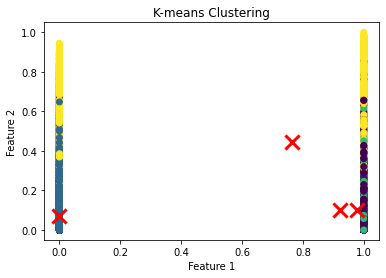

In [68]:
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Generate sample data
# # np.random.seed(0)
# # n_samples = 100
# # X = np.random.rand(n_samples, 2)

# # Perform k-means clustering
# n_clusters = 4
# kmeans = KMeans(n_clusters = 4, random_state = 123)
# kmeans.fit(arr1)
# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

# # Plot the data points and cluster centroids
# plt.scatter(arr1[:, 0], arr1[:, 1], c=labels)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red')
# plt.title('K-means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


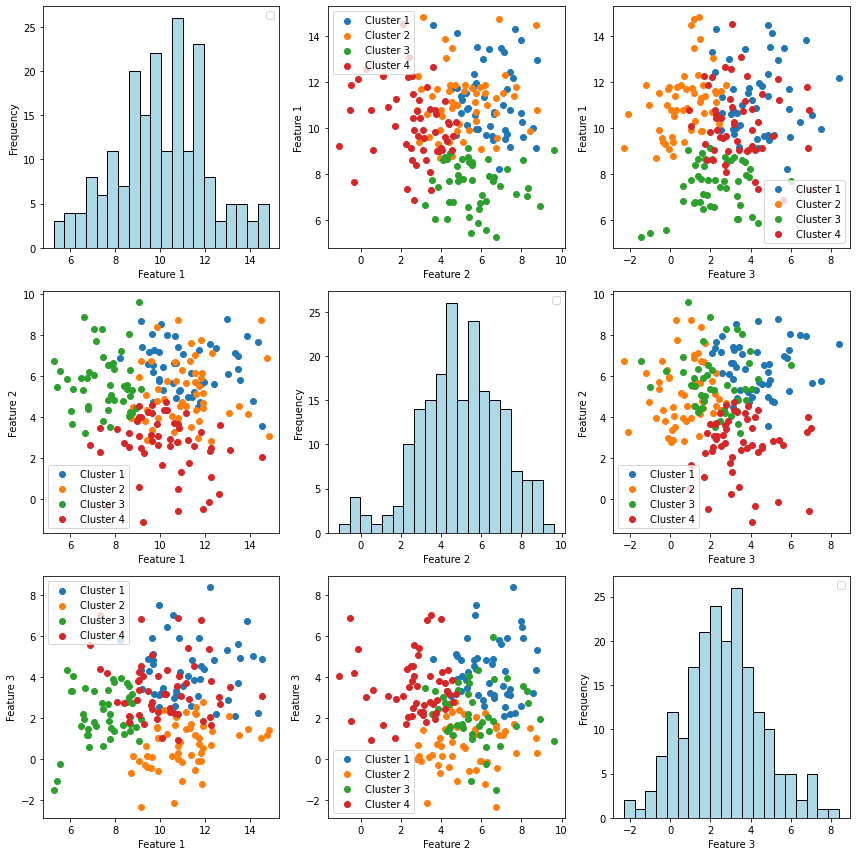

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random data
np.random.seed(0)
n_samples = 200
n_features = 3
X = np.random.randn(n_samples, n_features) * 2 + np.array([10, 5, 3])

# Perform k-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
labels = kmeans.labels_

# Plot scatter plots for different features
features = ['Feature 1', 'Feature 2', 'Feature 3']  # Replace with your own feature names

fig, axs = plt.subplots(n_features, n_features, figsize=(12, 12))
for i in range(n_features):
    for j in range(n_features):
        if i == j:
            axs[i, j].hist(X[:, i], bins=20, color='lightblue', edgecolor='black')
            axs[i, j].set_xlabel(features[i])
            axs[i, j].set_ylabel('Frequency')
        else:
            for cluster in range(n_clusters):
                axs[i, j].scatter(X[labels == cluster, j], X[labels == cluster, i], label=f'Cluster {cluster + 1}')
            axs[i, j].set_xlabel(features[j])
            axs[i, j].set_ylabel(features[i])
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [ ]:
# df_final_cluster.to_csv("region_mapped_cluster.csv",index=False)